# 1 Executor with limited resources

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark_session_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .config("spark.cores.max", 1)\
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/20 23:02:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/20 23:02:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# 1 Executor max resources

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark_session_single_executor = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .getOrCreate()

# 2 Executors with limited resources

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark_session_two_executors_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 2)\
        .getOrCreate()

# 2 Executors with max resources

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark_session_max = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 4)\
        .getOrCreate()

In [4]:
from pyspark.sql.types import *
import time

@F.udf(returnType=DoubleType()) 
def convertTMPtoDouble(str):
    str = str.replace(",",".")
    num = float(str)
    return num
    


def test_cluster_performance(session):
    start = time.time()
    rdd = session.read.csv("hdfs://192.168.2.43:9000/user/root/data/*/merge.csv", header = True)
    rdd = rdd.withColumn("TMP", convertTMPtoDouble(F.col("TMP")))
    rdd.agg(F.avg(rdd.TMP)).show() #.where(rdd.STATION == '01001099999')
    end = time.time()
    print(f"Specific configuration took {end-start:.2f} seconds")

In [5]:
test_cluster_performance(spark_session_low_perf)

23/03/20 23:02:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/20 23:03:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/20 23:03:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/20 23:03:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


ERROR:root:KeyboardInterrupt while sending command.                 (0 + 0) / 1]
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [6]:
spark_session_low_perf.stop()

In [1]:
!echo "test"

test


In [1]:
import numpy as np

titles = ["One Executor, One Core", "One Executor, Two Cores", "Two Executors, One Core each", "Two Executors, Two Cores each"]
times1 = [55.87,34.15,41.35,35.43] 
times2 = [43.38, 31.03, 35.95,30.56]
times = list(map(lambda l: np.average(l), map(list, zip(times1, times2))))
print(times)

[49.625, 32.59, 38.650000000000006, 32.995]


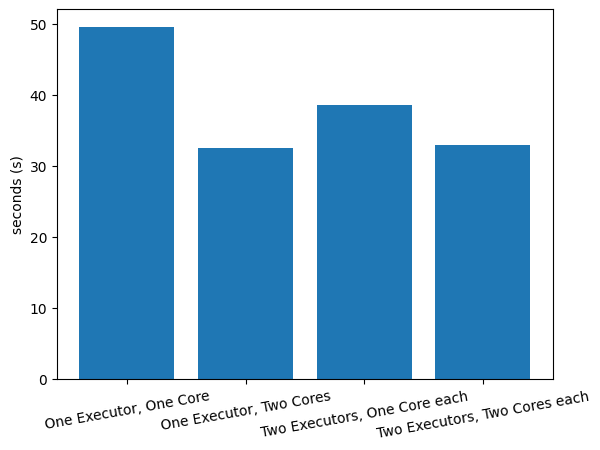

In [53]:
import matplotlib.pyplot as plt

fig = plt.bar(titles,times)
ticks = plt.xticks(rotation=10)
label = plt.ylabel("seconds (s)")
plt.show()